In [1]:
import torch
import numpy
import pickle
from deepsvg.difflib.tensor import SVGTensor
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.svg_path import SVGPath
from deepsvg.svglib.svg_primitive import SVGPathGroup
from deepsvg.svglib.geom import Bbox
import glob
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

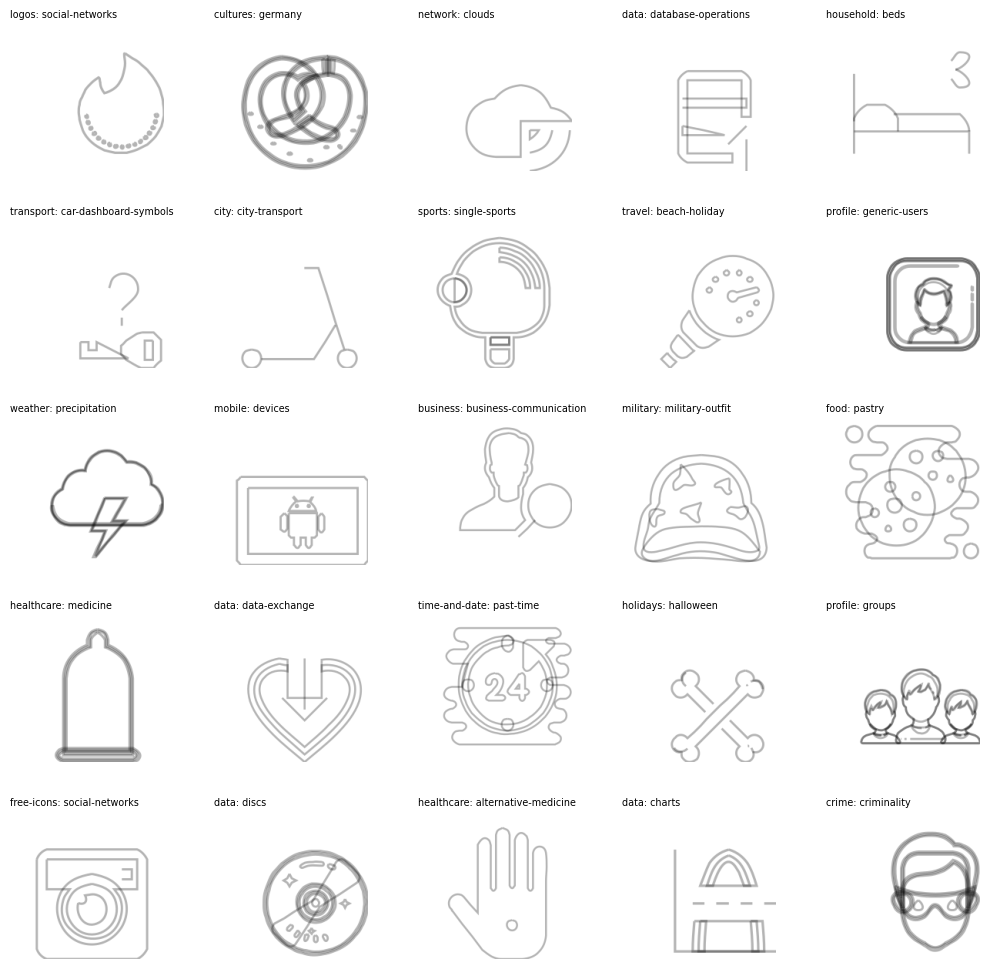

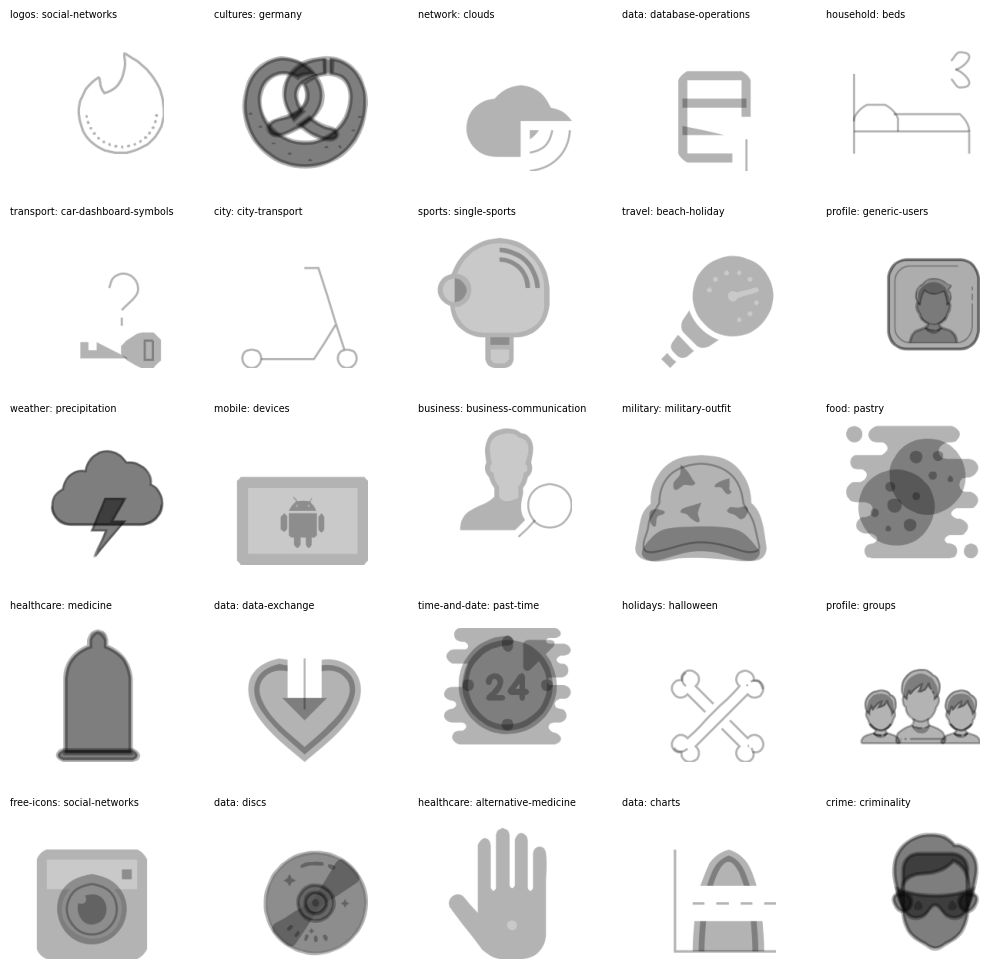

In [2]:
def pkl_to_svg(pkl_path:str = "/home/mfeuerpfeil/master/deepsvg/dataset/icons_tensor/99275.pkl", fill=True):
    with open(pkl_path, "rb") as f:
        loaded = pickle.load(f)
    
    idx = 0

    maximus = 0
    for x in loaded["tensors"][idx]:
        if x.max() > maximus:
            maximus=x.max().item()
    # print(loaded["fillings"])
    if(fill):
        fill_list = loaded["fillings"]
    else:
        fill_list = [0 for x in loaded["fillings"]]
    
    my_svg = SVG.from_tensors(loaded["tensors"][0], fill_list=fill_list, viewbox=Bbox(maximus))

    return my_svg

def draw_svg(idx:int, fill=True):
    files = glob.glob("/home/mfeuerpfeil/master/deepsvg/dataset/icons_tensor/*.pkl")
    # random.seed(421)
    # random_sample = random.sample(files, 1)[0]
    if idx > len(files)-1:
        idx = 0
    random_sample = files[idx]
    data_id = int(random_sample.split("/")[-1].replace(".pkl", ""))
    # print(data_id)
    random_svg = pkl_to_svg(random_sample, fill=fill)
    # print(random_svg.svg_path_groups[0].color)
    # print(random_svg.to_str())
    return random_svg.draw(return_png=True, do_display=False), data_id
    # my_svg.save_png("test.png")

def draw_25_images(image_index_tuples, context_df):
    # Generate 25 random images for demonstration
    # images = np.random.rand(25, 32, 32)  # Replace with your actual images
    images = [x[0] for x in image_index_tuples]
    idxs = [x[1] for x in image_index_tuples]

    # Create a figure and subplots
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))

    # Iterate over the subplots and images to display
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')  # Replace 'gray' with the desired colormap
        instance = df[df["id"] == idxs[i]]
        display_text = instance.category.values[0] + ": " + instance.subcategory.values[0]
        ax.text(x=0, y=0,s=display_text, fontsize='x-small')
        ax.axis('off')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

start = 75
# start = 0

df = pd.read_csv("/home/mfeuerpfeil/master/deepsvg/dataset/icons_meta.csv")

image_index_tuples = [draw_svg(i,fill=False) for i in range(start,start+25)]
image_index_tuples_fill = [draw_svg(i,fill=True) for i in range(start,start+25)]
draw_25_images(image_index_tuples, df)
draw_25_images(image_index_tuples_fill, df)

In [3]:
df.head()

,id,platform,total_len,nb_groups,len_groups,max_len_group,category,subcategory
0,0,ios11,67,10,"[8, 8, 7, 7, 7, 13, 11, 2, 2, 2]",13,characters,adventure-time-cartoon
1,1,ios11,121,14,"[9, 11, 11, 9, 8, 8, 9, 9, 4, 7, 15, 7, 7, 7]",15,characters,animation-characters
2,2,ios11,30,2,"[15, 15]",15,characters,cinema-symbols
3,3,ios11,45,7,"[22, 8, 5, 2, 2, 2, 4]",22,characters,cinema-symbols
4,4,ios11,66,6,"[19, 7, 16, 8, 9, 7]",19,characters,cinema-symbols


In [4]:
pkl_path = "/home/mfeuerpfeil/master/deepsvg/dataset/icons_tensor/1351.pkl"
with open(pkl_path, "rb") as f:
    loaded = pickle.load(f)

In [5]:
loaded

{'tensors': [[tensor([[  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  44.,  54.,  -1.,  -1.,  -1.,  -1.,
             75.,  80.],
           [  1.,  -1.,  -1.,  -1.,  -1.,  -1.,  75.,  80.,  -1.,  -1.,  -1.,  -1.,
            103.,  80.],
           [  1.,  -1.,  -1.,  -1.,  -1.,  -1., 103.,  80.,  -1.,  -1.,  -1.,  -1.,
            131.,  80.],
           [  1.,  -1.,  -1.,  -1.,  -1.,  -1., 131.,  80.,  -1.,  -1.,  -1.,  -1.,
            159.,  80.],
           [  2.,  -1.,  -1.,  -1.,  -1.,  -1., 159.,  80., 172.,  83., 177.,  88.,
            180., 101.],
           [  1.,  -1.,  -1.,  -1.,  -1.,  -1., 180., 101.,  -1.,  -1.,  -1.,  -1.,
            180., 133.],
           [  1.,  -1.,  -1.,  -1.,  -1.,  -1., 180., 133.,  -1.,  -1.,  -1.,  -1.,
            180., 164.],
           [  2.,  -1.,  -1.,  -1.,  -1.,  -1., 180., 164., 177., 177., 172., 182.,
            159., 185.],
           [  1.,  -1.,  -1.,  -1.,  -1.,  -1., 159., 185.,  -1.,  -1.,  -1.,  -1.,
            131., 185.],
        